In [36]:
import pandas as pd

df_union_sep = pd.read_csv('/content/df_union sep.csv')
display(df_union_sep.shape)

(1779908, 17)

Creamos una copia sin id y sin datos faltantes

In [4]:
df_union_copy = df_union_sep.drop(columns=['hash_sha256_num', 'id_fecha'])
display(df_union_copy.head())

G√©nero Grupo etario C√≥digo de la entidad Nombre de la entidad  \
0   Femenino        1 a 5               EPS037       NUEVA EPS S.A.   
1  Masculino      15 a 19               EPS041   NUEVA EPS S.A. -CM   
2   Femenino      15 a 19               EPS041   NUEVA EPS S.A. -CM   
3   Femenino      50 a 55               EPS037       NUEVA EPS S.A.   
4   Femenino      60 a 65               EPS037       NUEVA EPS S.A.   

        R√©gimen Tipo de afiliado Estado del afiliado  \
0  Contributivo     BENEFICIARIO              Activo   
1  Contributivo        COTIZANTE              Activo   
2  Contributivo     BENEFICIARIO              Activo   
3  Contributivo        COTIZANTE              Activo   
4  Contributivo        COTIZANTE              Activo   

  Condici√≥n del beneficiario Zona de Afiliaci√≥n  Departamento    Municipio  \
0                  NO APLICA             Urbana     ANTIOQUIA      BETULIA   
1                  NO APLICA             Urbana         HUILA     PITALITO   
2                  NO APLICA             Urbana        BOYACA     SOGAMOSO   
3                  NO APLICA             Urbana       CORDOBA  LA APARTADA   
4                  NO APLICA             Urbana  CUNDINAMARCA     ARBELAEZ   

  Nivel del Sisb√©n         Grupo poblacional del afiliado  \
0                N  V√çCTIMAS DEL CONFLICTO ARMADO INTERNO   
1                1                   POBLACI√ìN CON SISBEN   
2                0                                    NaN   
3                0                                    NaN   
4                1                   POBLACI√ìN CON SISBEN   

   Cantidad de registros Fecha de actualizaci√≥n  
0                      2    2025-09-06 22:28:56  
1                      2    2025-09-06 22:28:56  
2                     13    2025-09-06 22:28:56  
3                      3    2025-09-06 22:28:56  
4                      1    2025-09-06 22:28:56

In [5]:
df_union_copy = df_union_copy.drop(columns=['Grupo poblacional del afiliado', 'Cantidad de registros', 'Fecha de actualizaci√≥n'], errors='ignore')
df_union_copy.dropna(inplace=True)
print(df_union_copy.isnull().sum())

G√©nero                        0
Grupo etario                  0
C√≥digo de la entidad          0
Nombre de la entidad          0
R√©gimen                       0
Tipo de afiliado              0
Estado del afiliado           0
Condici√≥n del beneficiario    0
Zona de Afiliaci√≥n            0
Departamento                  0
Municipio                     0
Nivel del Sisb√©n              0
dtype: int64


In [6]:
print(df_union_copy.dtypes)

G√©nero                        object
Grupo etario                  object
C√≥digo de la entidad          object
Nombre de la entidad          object
R√©gimen                       object
Tipo de afiliado              object
Estado del afiliado           object
Condici√≥n del beneficiario    object
Zona de Afiliaci√≥n            object
Departamento                  object
Municipio                     object
Nivel del Sisb√©n              object
dtype: object


In [34]:
display(df_union_copy.head())
display(df_union_copy.shape)

G√©nero Grupo etario C√≥digo de la entidad Nombre de la entidad  \
0   Femenino        1 a 5               EPS037       NUEVA EPS S.A.   
1  Masculino      15 a 19               EPS041   NUEVA EPS S.A. -CM   
2   Femenino      15 a 19               EPS041   NUEVA EPS S.A. -CM   
3   Femenino      50 a 55               EPS037       NUEVA EPS S.A.   
4   Femenino      60 a 65               EPS037       NUEVA EPS S.A.   

        R√©gimen Tipo de afiliado Estado del afiliado  \
0  Contributivo     BENEFICIARIO              Activo   
1  Contributivo        COTIZANTE              Activo   
2  Contributivo     BENEFICIARIO              Activo   
3  Contributivo        COTIZANTE              Activo   
4  Contributivo        COTIZANTE              Activo   

  Condici√≥n del beneficiario Zona de Afiliaci√≥n  Departamento    Municipio  \
0                  NO APLICA             Urbana     ANTIOQUIA      BETULIA   
1                  NO APLICA             Urbana         HUILA     PITALITO   
2                  NO APLICA             Urbana        BOYACA     SOGAMOSO   
3                  NO APLICA             Urbana       CORDOBA  LA APARTADA   
4                  NO APLICA             Urbana  CUNDINAMARCA     ARBELAEZ   

  Nivel del Sisb√©n  
0                N  
1                1  
2                0  
3                0  
4                1

(75997, 12)

## An√°lsis Bivariado

In [9]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Vista general de las variables
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75997 entries, 0 to 75996
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   G√©nero                      75997 non-null  object
 1   Grupo etario                75997 non-null  object
 2   C√≥digo de la entidad        75997 non-null  object
 3   Nombre de la entidad        75997 non-null  object
 4   R√©gimen                     75997 non-null  object
 5   Tipo de afiliado            75997 non-null  object
 6   Estado del afiliado         75997 non-null  object
 7   Condici√≥n del beneficiario  75997 non-null  object
 8   Zona de Afiliaci√≥n          75997 non-null  object
 9   Departamento                75997 non-null  object
 10  Municipio                   75997 non-null  object
 11  Nivel del Sisb√©n            75997 non-null  object
dtypes: object(12)
memory usage: 7.0+ MB


G√©nero Grupo etario C√≥digo de la entidad Nombre de la entidad  \
0   Femenino        1 a 5               EPS037       NUEVA EPS S.A.   
1  Masculino      15 a 19               EPS041   NUEVA EPS S.A. -CM   
2   Femenino      15 a 19               EPS041   NUEVA EPS S.A. -CM   
3   Femenino      50 a 55               EPS037       NUEVA EPS S.A.   
4   Femenino      60 a 65               EPS037       NUEVA EPS S.A.   

        R√©gimen Tipo de afiliado Estado del afiliado  \
0  Contributivo     BENEFICIARIO              Activo   
1  Contributivo        COTIZANTE              Activo   
2  Contributivo     BENEFICIARIO              Activo   
3  Contributivo        COTIZANTE              Activo   
4  Contributivo        COTIZANTE              Activo   

  Condici√≥n del beneficiario Zona de Afiliaci√≥n  Departamento    Municipio  \
0                  NO APLICA             Urbana     ANTIOQUIA      BETULIA   
1                  NO APLICA             Urbana         HUILA     PITALITO   
2                  NO APLICA             Urbana        BOYACA     SOGAMOSO   
3                  NO APLICA             Urbana       CORDOBA  LA APARTADA   
4                  NO APLICA             Urbana  CUNDINAMARCA     ARBELAEZ   

  Nivel del Sisb√©n  
0                N  
1                1  
2                0  
3                0  
4                1

R√©gimen vs Tipo de afiliado

Tabla de contingencia:
 Tipo de afiliado  ADICIONAL  BENEFICIARIO  CABEZA DE FAMILIA  COTIZANTE  \
R√©gimen                                                                   
Contributivo           7308        304336                  0     329677   
Subsidiado                0        381568             757015          0   

Tipo de afiliado  OTRO MIEMBRO DEL NUCLEO FAMILIAR  
R√©gimen                                             
Contributivo                                     0  
Subsidiado                                       4  

Distribuci√≥n porcentual (%):
 Tipo de afiliado  ADICIONAL  BENEFICIARIO  CABEZA DE FAMILIA  COTIZANTE  \
R√©gimen                                                                   
Contributivo           1.14         47.45               0.00      51.41   
Subsidiado             0.00         33.51              66.49       0.00   

Tipo de afiliado  OTRO MIEMBRO DEL NUCLEO FAMILIAR  
R√©gimen                                             
Contributivo        

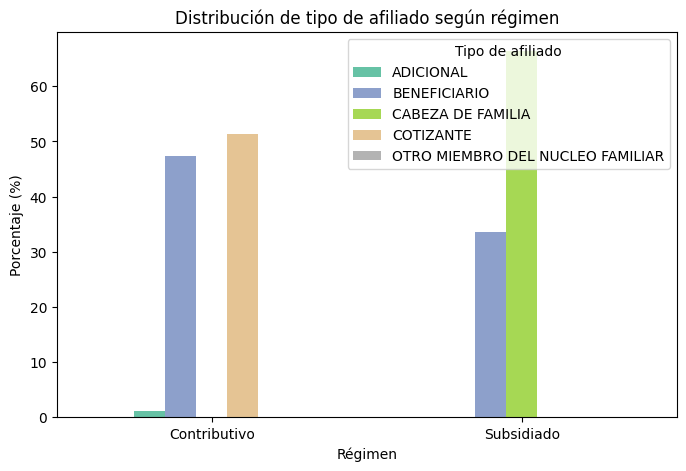

In [50]:
# -----------------------------
# 1. Tabla de contingencia R√©gimen vs Tipo de afiliado
# -----------------------------

tabla = pd.crosstab(df['R√©gimen'], df['Tipo de afiliado'])
print("Tabla de contingencia:\n", tabla)

df=df_union_sep
# -----------------------------
# 2. Porcentajes por fila
# -----------------------------
tabla_pct = pd.crosstab(df['R√©gimen'], df['Tipo de afiliado'], normalize='index') * 100
print("\nDistribuci√≥n porcentual (%):\n", tabla_pct.round(2))

# -----------------------------
# 3. Prueba Chi-cuadrado de independencia
# -----------------------------
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"\nChi2 = {chi2:.3f}, gl = {dof}, p-valor = {p:.4f}")

if p < 0.05:
    print("üëâ Existe asociaci√≥n significativa entre R√©gimen y Tipo de afiliado.")
else:
    print("üëâ No se observa asociaci√≥n estad√≠sticamente significativa.")

# A partir de la tabla de contingencia
n = tab.values.sum()
phi2 = chi2/n
r, k = tab.shape
phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
rcorr = r - ((r-1)**2)/(n-1)
kcorr = k - ((k-1)**2)/(n-1)
cramers_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
print(f"Cram√©r's V = {cramers_v:.3f}")


if p < 0.05:
    print("üëâ Existe asociaci√≥n significativa.")
else:
    print("üëâ No se observa asociaci√≥n significativa.")


# -----------------------------
# 4. Gr√°fico de barras agrupadas
# -----------------------------
tabla_pct.plot(kind='bar', stacked=False, figsize=(8,5), colormap='Set2')
plt.title('Distribuci√≥n de tipo de afiliado seg√∫n r√©gimen')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=0)
plt.show()



G√©nero vs Condici√≥n del beneficiario

Tabla de contingencia:
 Condici√≥n del beneficiario  DISCAPACIDAD  ESTUDIANTE  NO APLICA
G√©nero                                                         
Femenino                           12616        8743     847061
Masculino                          13756        7943     889789

Chi2=96.731 | gl=2 | p-valor=0.000000
Conclusi√≥n: Asociaci√≥n significativa.

Distribuci√≥n porcentual por g√©nero (%):
 Condici√≥n del beneficiario  DISCAPACIDAD  ESTUDIANTE  NO APLICA
G√©nero                                                         
Femenino                            1.45        1.01      97.54
Masculino                           1.51        0.87      97.62
Cram√©r's V = 0.007
üëâ Existe asociaci√≥n significativa.


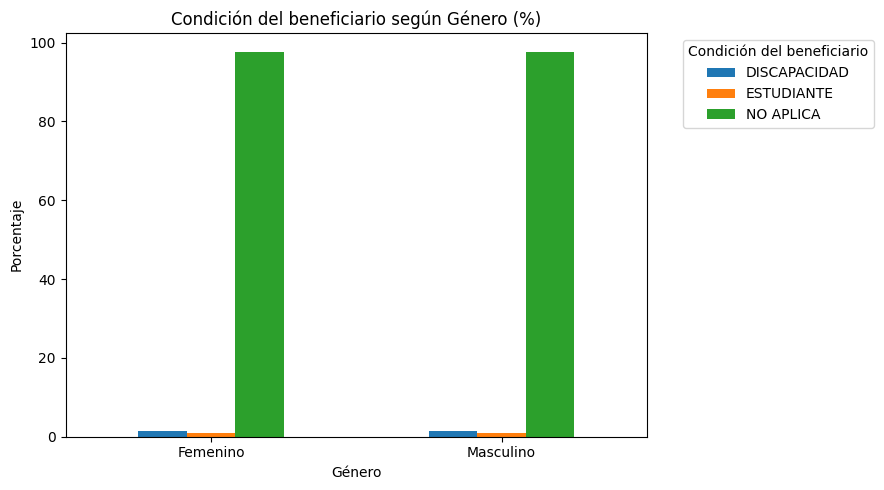

In [38]:
sub = df[['G√©nero', 'Condici√≥n del beneficiario']].dropna()

tab = pd.crosstab(sub['G√©nero'], sub['Condici√≥n del beneficiario'])
print("Tabla de contingencia:\n", tab)

chi2, p, dof, exp = chi2_contingency(tab)
print(f"\nChi2={chi2:.3f} | gl={dof} | p-valor={p:.6f}")
print("Conclusi√≥n:", "Asociaci√≥n significativa." if p < 0.05 else "No significativa.")

tab_pct = pd.crosstab(sub['G√©nero'], sub['Condici√≥n del beneficiario'], normalize='index')*100
print("\nDistribuci√≥n porcentual por g√©nero (%):\n", tab_pct.round(2))

# A partir de la tabla de contingencia
n = tab.values.sum()
phi2 = chi2/n
r, k = tab.shape
phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
rcorr = r - ((r-1)**2)/(n-1)
kcorr = k - ((k-1)**2)/(n-1)
cramers_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
print(f"Cram√©r's V = {cramers_v:.3f}")


if p < 0.05:
    print("üëâ Existe asociaci√≥n significativa.")
else:
    print("üëâ No se observa asociaci√≥n significativa.")

ax = tab_pct.plot(kind='bar', figsize=(9,5))
ax.set_title('Condici√≥n del beneficiario seg√∫n G√©nero (%)')
ax.set_ylabel('Porcentaje')
ax.set_xlabel('G√©nero')
plt.xticks(rotation=0)
plt.legend(title='Condici√≥n del beneficiario', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



Grupo etario vs Estado del afiliado

Tabla de contingencia:
 Estado del afiliado  Activo  Protecci√≥n Laboral C
Grupo etario                                     
1 a 5                145163                  2688
15 a 19              158084                  3190
19 a 45              332246                 16588
45 a 50              150356                  4150
5 a 15               206591                  5267
50 a 55              139285                  3417
55 a 60              130590                  3113
60 a 65              117434                  2569
65 a 70               99934                  1641
70 a 75               82351                  1148
< 1                   79300                  1228
> 75                  92225                  1350

Chi2=8912.670 | gl=11 | p-valor=0.000000
Conclusi√≥n: Asociaci√≥n significativa.

Distribuci√≥n porcentual por grupo etario (%):
 Estado del afiliado  Activo  Protecci√≥n Laboral C
Grupo etario                                     
1 a 5                 98.18                

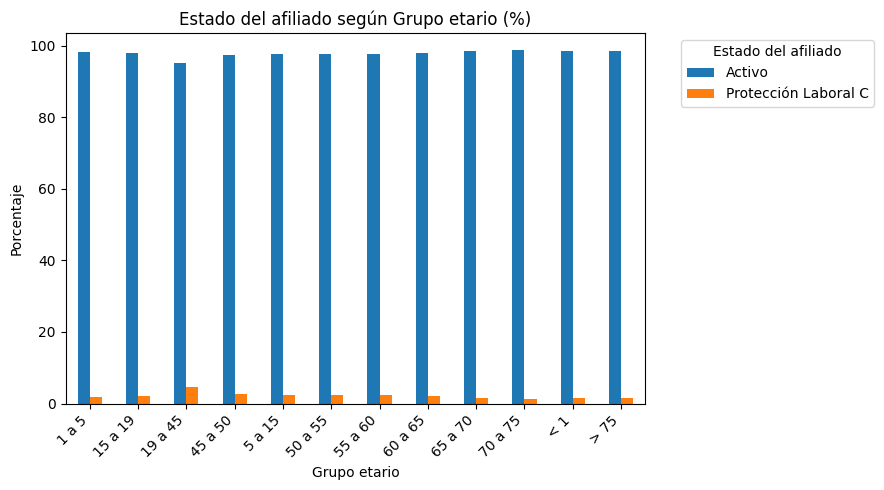

In [39]:
sub = df[['Grupo etario', 'Estado del afiliado']].dropna()

tab = pd.crosstab(sub['Grupo etario'], sub['Estado del afiliado'])
print("Tabla de contingencia:\n", tab)

chi2, p, dof, exp = chi2_contingency(tab)
print(f"\nChi2={chi2:.3f} | gl={dof} | p-valor={p:.6f}")
print("Conclusi√≥n:", "Asociaci√≥n significativa." if p < 0.05 else "No significativa.")

tab_pct = pd.crosstab(sub['Grupo etario'], sub['Estado del afiliado'], normalize='index')*100
print("\nDistribuci√≥n porcentual por grupo etario (%):\n", tab_pct.round(2))

# A partir de la tabla de contingencia
n = tab.values.sum()
phi2 = chi2/n
r, k = tab.shape
phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
rcorr = r - ((r-1)**2)/(n-1)
kcorr = k - ((k-1)**2)/(n-1)
cramers_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
print(f"Cram√©r's V = {cramers_v:.3f}")


if p < 0.05:
    print("üëâ Existe asociaci√≥n significativa.")
else:
    print("üëâ No se observa asociaci√≥n significativa.")

ax = tab_pct.plot(kind='bar', figsize=(9,5))
ax.set_title('Estado del afiliado seg√∫n Grupo etario (%)')
ax.set_ylabel('Porcentaje')
ax.set_xlabel('Grupo etario')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Estado del afiliado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Zona de Afiliaci√≥n vs Nivel del Sisb√©n

Tabla de contingencia:
 Nivel del Sisb√©n                0       1       2     3  4      A     B  \
Zona de Afiliaci√≥n                                                        
Rural                       61535  178428   99294   603  0   7592  1191   
Rural - Dispersal           29362   48794   19759    21  0   2556   341   
Rural - Resto Rural          4305    2487     676     1  2     31     4   
Urbana                     128069  224471  148307  2658  2  10923  2879   
Urbana - Centro Poblado      5253    3820    1357     0  0    303    46   
Urbana-Cabecera Municipal   61056   75022   40305   112  0   4000  1044   

Nivel del Sisb√©n               C       N      O  
Zona de Afiliaci√≥n                               
Rural                       7846  186379  16455  
Rural - Dispersal           2641   36777   4791  
Rural - Resto Rural           28    2522    127  
Urbana                     11546  253318  21659  
Urbana - Centro Poblado      331    2232    602  
Urbana-Cabecera Munic

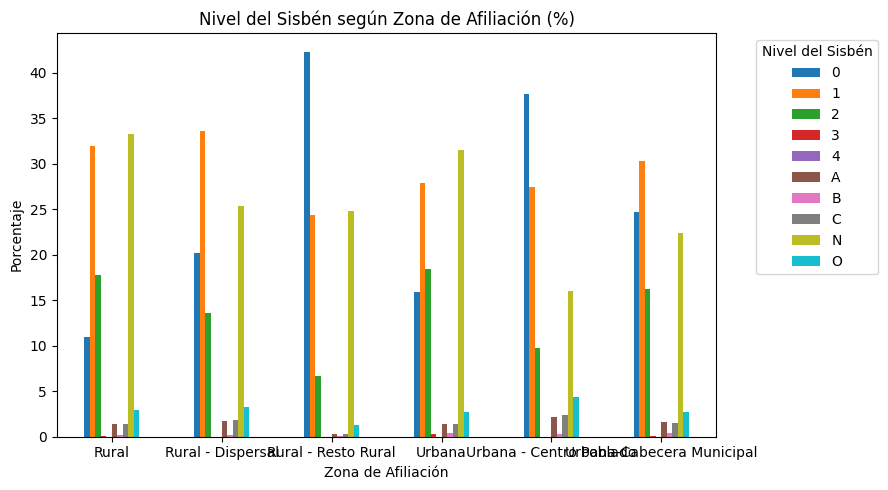

In [40]:
sub = df[['Departamento', 'R√©gimen']].dropna()

# Limitar a los 12 departamentos con m√°s registros para visualizaci√≥n clara
topN = 12
top_deps = sub['Departamento'].value_counts().nlargest(topN).index
sub_top = sub[sub['Departamento'].isin(top_deps)]

tab = pd.crosstab(sub_top['Departamento'], sub_top['R√©gimen'])
print("Tabla de contingencia (Top 12 departamentos):\n", tab)

chi2, p, dof, exp = chi2_contingency(tab)
print(f"\nChi2={chi2:.3f} | gl={dof} | p-valor={p:.6f}")
print("Conclusi√≥n:", "Asociaci√≥n significativa." if p < 0.05 else "No significativa.")

tab_pct = pd.crosstab(sub_top['Departamento'], sub_top['R√©gimen'], normalize='index')*100
print("\nDistribuci√≥n porcentual por departamento (Top 12) (%):\n", tab_pct.round(2))

ax = tab_pct.plot(kind='bar', figsize=(11,6))
ax.set_title('R√©gimen por Departamento (Top 12) (%)')
ax.set_ylabel('Porcentaje')
ax.set_xlabel('Departamento')
plt.xticks(rotation=45, ha='right')
plt.legend(title='R√©gimen', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Departamento vs Nivel de Sisben

Tabla de contingencia (Top 12 departamentos):
 R√©gimen       Contributivo  Subsidiado
Departamento                          
ANTIOQUIA            80836      117101
ATLANTICO            23306       41048
BOLIVAR              27519       49385
BOYACA               39850       61809
CAUCA                22115       43935
CORDOBA              26539       50220
CUNDINAMARCA         69079      100813
MAGDALENA            19058       41333
NARINO               20491       52599
SANTANDER            39985       62456
TOLIMA               25437       46171
VALLE                47271       74457

Chi2=6683.259 | gl=11 | p-valor=0.000000
Conclusi√≥n: Asociaci√≥n significativa.

Distribuci√≥n porcentual por departamento (Top 12) (%):
 R√©gimen       Contributivo  Subsidiado
Departamento                          
ANTIOQUIA            40.84       59.16
ATLANTICO            36.22       63.78
BOLIVAR              35.78       64.22
BOYACA               39.20       60.80
CAUCA                33.48     

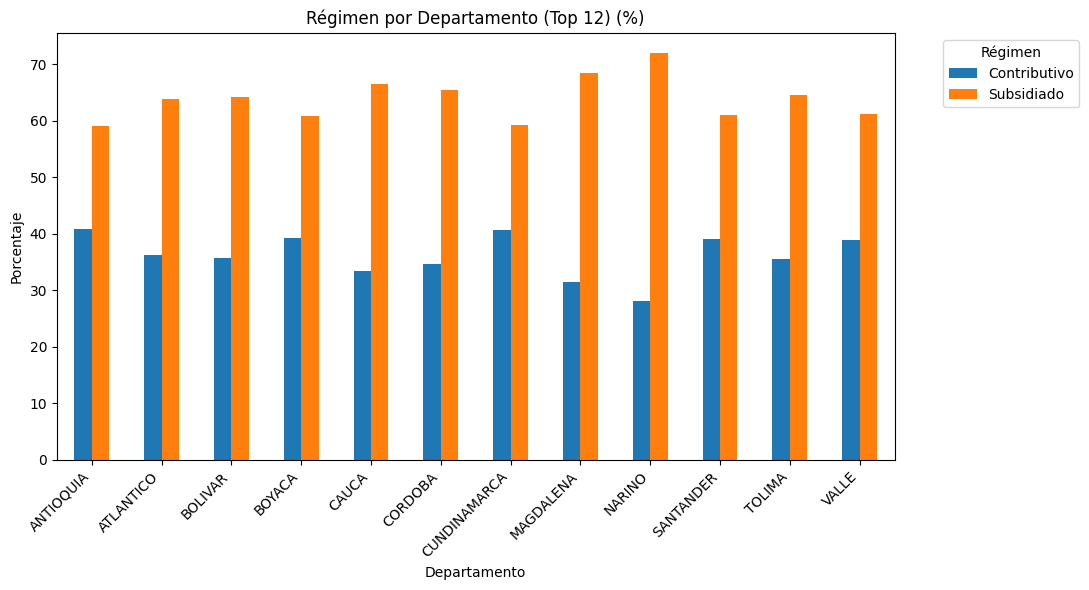

In [49]:
sub = df[['Departamento', 'R√©gimen']].dropna()

# Limitar a los 12 departamentos con m√°s registros para visualizaci√≥n clara
topN = 12
top_deps = sub['Departamento'].value_counts().nlargest(topN).index
sub_top = sub[sub['Departamento'].isin(top_deps)]

tab = pd.crosstab(sub_top['Departamento'], sub_top['R√©gimen'])
print("Tabla de contingencia (Top 12 departamentos):\n", tab)

chi2, p, dof, exp = chi2_contingency(tab)
print(f"\nChi2={chi2:.3f} | gl={dof} | p-valor={p:.6f}")
print("Conclusi√≥n:", "Asociaci√≥n significativa." if p < 0.05 else "No significativa.")

tab_pct = pd.crosstab(sub_top['Departamento'], sub_top['R√©gimen'], normalize='index')*100
print("\nDistribuci√≥n porcentual por departamento (Top 12) (%):\n", tab_pct.round(2))

# A partir de la tabla de contingencia
n = tab.values.sum()
phi2 = chi2/n
r, k = tab.shape
phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
rcorr = r - ((r-1)**2)/(n-1)
kcorr = k - ((k-1)**2)/(n-1)
cramers_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
print(f"Cram√©r's V = {cramers_v:.3f}")

ax = tab_pct.plot(kind='bar', figsize=(11,6))
ax.set_title('R√©gimen por Departamento (Top 12) (%)')
ax.set_ylabel('Porcentaje')
ax.set_xlabel('Departamento')
plt.xticks(rotation=45, ha='right')
plt.legend(title='R√©gimen', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##An√°lisis Multivariado

<Axes: title={'center': 'Distribuci√≥n de los reg√≠menes'}, xlabel='R√©gimen'>

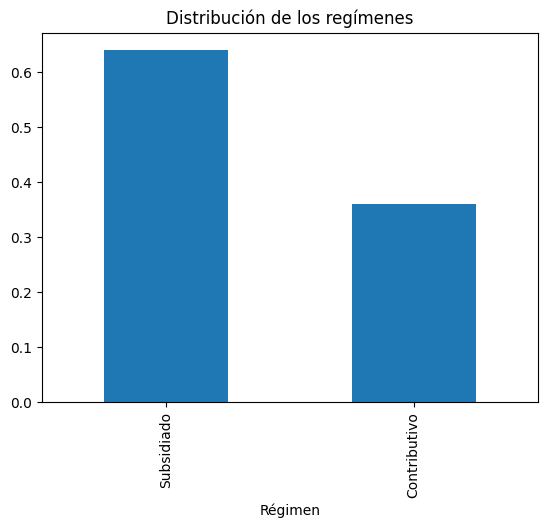

In [ ]:
df_union_copy['R√©gimen'].value_counts(normalize=True).plot(kind='bar', title='Distribuci√≥n de los reg√≠menes')

| R√©gimen          | Participaci√≥n | Interpretaci√≥n socioecon√≥mica                                                         |
| ---------------- | ------------- | ------------------------------------------------------------------------------------- |
| **Subsidiado**   | ~64%          | Mayor presencia de poblaci√≥n en condiciones de vulnerabilidad o informalidad laboral. |
| **Contributivo** | ~36%          | Menor proporci√≥n de trabajadores formales o con ingresos estables.                    |


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

df = df_union_copy.copy()

y = df['R√©gimen']
X = df.drop(columns=['R√©gimen'])

# (opcional) reducir cardinalidad: top-N por columna
def topN_or_other(s, N=50):
    top = s.value_counts().nlargest(N).index
    return s.where(s.isin(top), other='__OTRO__')

high_card_cols = [c for c in X.columns if X[c].nunique() > 60]   # ajusta el umbral
for c in high_card_cols:
    X[c] = topN_or_other(X[c], N=60)

# codificaci√≥n esparcida y tipo chico
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=True, dtype=np.int8)

# reducci√≥n tipo ‚ÄúPCA para sparse‚Äù (MCA aproximado)
svd = TruncatedSVD(n_components=2, random_state=42)

pipe = Pipeline([
    ('enc', ohe),
    ('svd', svd),   # entrega 2 componentes para graficar/analizar
])

X_svd = pipe.fit_transform(X)

#2) Visualizaci√≥n/diagn√≥stico con muestra estratificada

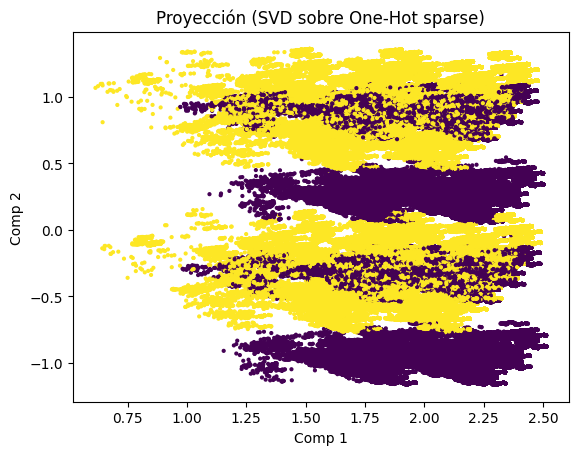

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=50000, random_state=42) # ajusta tama√±o
idx_train, _ = next(sss.split(df, y))
df_sample = df.iloc[idx_train].reset_index(drop=True)

y_s = df_sample['R√©gimen']
X_s = df_sample.drop(columns=['R√©gimen'])

for c in [c for c in X_s.columns if X_s[c].nunique() > 60]:
    X_s[c] = topN_or_other(X_s[c], N=60)

X_svd = Pipeline([('enc', ohe), ('svd', svd)]).fit_transform(X_s)

# ejemplo de scatter
import matplotlib.pyplot as plt
import pandas as pd
h = pd.factorize(y_s)[0]
plt.scatter(X_svd[:,0], X_svd[:,1], c=h, s=4)
plt.title('Proyecci√≥n (SVD sobre One-Hot sparse)'); plt.xlabel('Comp 1'); plt.ylabel('Comp 2')
plt.show()

| Observaci√≥n            | Interpretaci√≥n                                            |
| ---------------------- | --------------------------------------------------------- |
| Colores bien separados | Alta diferenciaci√≥n entre reg√≠menes                       |
| Bandas horizontales    | Estratos o grupos definidos por combinaciones categ√≥ricas |
| Zonas de mezcla        | √Åreas donde ambos reg√≠menes comparten caracter√≠sticas     |
| Poca dispersi√≥n        | Variables explican bien el comportamiento del r√©gimen     |


#3) Fuerza de asociaci√≥n  (œá¬≤ / Cramer‚Äôs V)

In [ ]:
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    tab = pd.crosstab(x, y)
    chi2 = chi2_contingency(tab, correction=False)[0]
    n = tab.to_numpy().sum()
    r, k = tab.shape
    phi2 = chi2 / n
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

scores = {c: cramers_v(df[c], df['R√©gimen']) for c in df.columns if c!='R√©gimen'}
pd.Series(scores).sort_values(ascending=False)

C√≥digo de la entidad          0.999983
Tipo de afiliado              0.766364
Nombre de la entidad          0.673055
Nivel del Sisb√©n              0.578552
Estado del afiliado           0.217868
Municipio                     0.134788
Zona de Afiliaci√≥n            0.125388
Condici√≥n del beneficiario    0.121343
Grupo etario                  0.117238
Departamento                  0.092710
G√©nero                        0.008943
dtype: float64

| Variable                               | Valor (Œ∏)                                                                                                                                                                                                                                           | Interpretaci√≥n |
| -------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | -------------- |
| **C√≥digo de la entidad (0.999983)**    | Asociaci√≥n casi perfecta. El tipo de **EPS** (entidad prestadora) pr√°cticamente determina el r√©gimen. En la base, cada r√©gimen parece estar ligado a un conjunto espec√≠fico de c√≥digos de entidad (por ejemplo, EPS subsidiadas vs. contributivas). |                |
| **Tipo de afiliado (0.766)**           | Asociaci√≥n fuerte. El tipo de afiliado (Cotizante o Beneficiario) tiene una gran influencia: los **cotizantes** suelen pertenecer al **r√©gimen contributivo**, y los **beneficiarios** o **subsidiados** al **r√©gimen subsidiado**.                 |                |
| **Nombre de la entidad (0.673)**       | Asociaci√≥n fuerte. Similar al c√≥digo, indica que ciertas **EPS** operan en un r√©gimen espec√≠fico.                                                                                                                                                   |                |
| **Nivel del Sisb√©n (0.579)**           | Asociaci√≥n fuerte. Los **niveles bajos del Sisb√©n (0, 1, 2)** se asocian con el **r√©gimen subsidiado**, mientras que niveles altos o ausencia de Sisb√©n con el **contributivo**.                                                                    |                |
| **Estado del afiliado (0.218)**        | Asociaci√≥n d√©bil-moderada. El estado (activo/inactivo) tiene alg√∫n efecto, pero no determina el r√©gimen.                                                                                                                                            |                |
| **Municipio (0.135)**                  | Asociaci√≥n d√©bil. Hay diferencias regionales, pero no son determinantes del r√©gimen.                                                                                                                                                                |                |
| **Zona de Afiliaci√≥n (0.126)**         | Asociaci√≥n d√©bil. Aunque el r√©gimen subsidiado puede tener m√°s afiliados rurales, la variable no explica por s√≠ sola el r√©gimen.                                                                                                                    |                |
| **Condici√≥n del beneficiario (0.121)** | Asociaci√≥n d√©bil. Puede reforzar lo que ya explica el tipo de afiliado.                                                                                                                                                                             |                |
| **Grupo etario (0.117)**               | Asociaci√≥n d√©bil. La edad influye ligeramente, pero no define el r√©gimen.                                                                                                                                                                           |                |
| **Departamento (0.093)**               | Asociaci√≥n d√©bil. Existen diferencias geogr√°ficas marginales.                                                                                                                                                                                       |                |
| **G√©nero (0.009)**                     | Sin asociaci√≥n. El sexo no influye en el r√©gimen de afiliaci√≥n.                                                                                                                                                                                     |                |


#4) Modelo explicativo

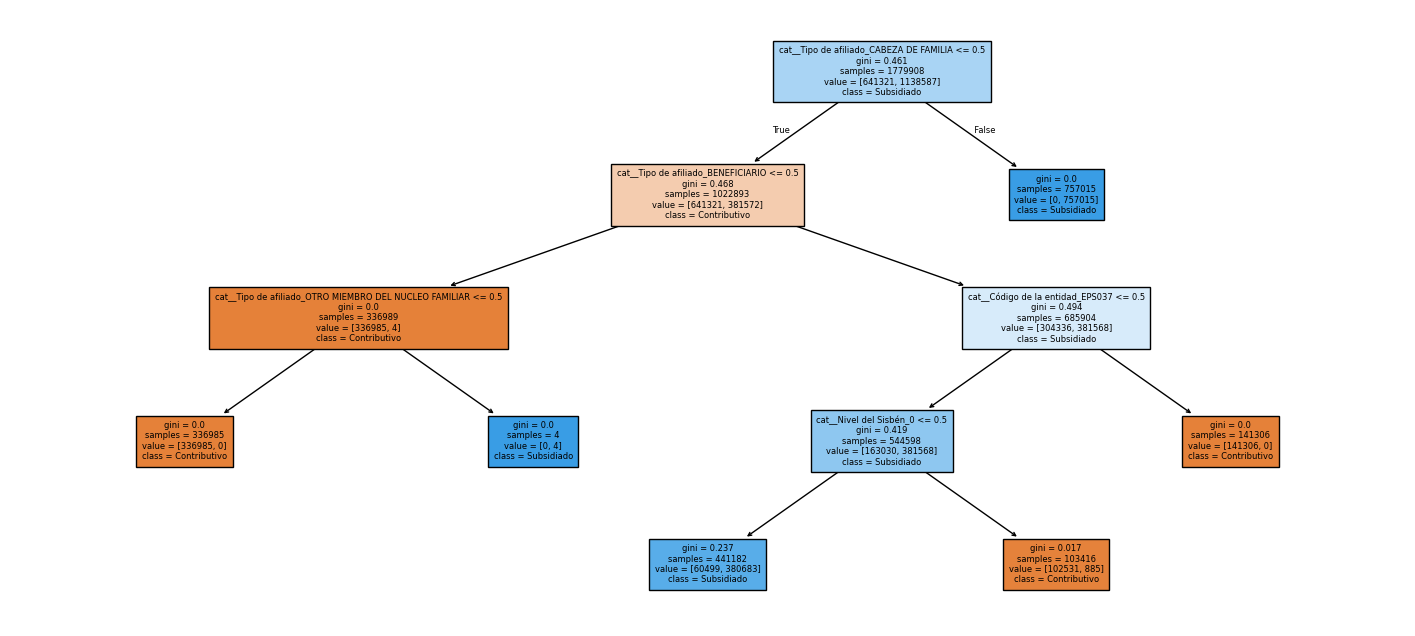

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df_union_copy.drop(columns=['R√©gimen'])
y = df_union_copy['R√©gimen']

categorical_features = X.columns.tolist()
encoder = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

tree = DecisionTreeClassifier(max_depth=4, random_state=42)

pipe = Pipeline(steps=[('encoder', encoder), ('tree', tree)])
pipe.fit(X, y)

plt.figure(figsize=(18,8))
plot_tree(tree, filled=True, feature_names=pipe['encoder'].get_feature_names_out(), class_names=pipe.classes_, fontsize=6)
plt.show()

| Nivel del √°rbol | Variable                              | Rol explicativo               | R√©gimen asociado                                                                |
| --------------- | ------------------------------------- | ----------------------------- | ------------------------------------------------------------------------------- |
| 1               | Tipo de afiliado                      | Eje principal del modelo      | Define el tipo de participaci√≥n (cotizante / beneficiario / cabeza de familia). |
| 2               | C√≥digo de la entidad (EPS)            | Segmenta por instituci√≥n      | EPS distintas operan en distintos reg√≠menes.                                    |
| 3               | Nivel del Sisb√©n                      | Determina condici√≥n econ√≥mica | Niveles bajos ‚Üí subsidiado.                                                     |
| 4               | Condiciones espec√≠ficas de afiliaci√≥n | Ajustes menores               | Diferencian casos residuales.                                                   |
